# Mini-taller de programación de redes en Python

##  Que si y que no

** Nota sobre Python:**

IMPORTANTE: SI NO SABES PROGRAMAR LO BASICO EN PYTHON, PROBABLEMENTE ESTE CURSO NO SEA PARA TI.

Si aún así insistes en tomarlo, en la dirección:

https://github.com/fhca/cursodepython

he puesto ayuda y libretas como esta para:

* instalar Python y bibliotecas auxiliares. Necesitarás instalar:
    * `python` 3.5 o mayor, NOTA: no instales python 2.xx
    * `numpy`
    * `matplotlib`
    * `jupyter`
    * `networkx` `   ` (se instala de manera similar a numpy)
  
  para seguir los ejemplos de estas notas.
* aprender a utilizar este ambiente de desarrollo llamado `Jupyter`
* aprender a programar Python desde cero

Te recomiendo que ahí presiones el botón verde para descargar el archivo ZIP, que deberás descomprimir para instalar todos los archivos que ahí se encuentran (si los bajas uno por uno puedes tener problemas).

También puedes usar el menú `Help` de Jupyter (este programa), para dar un tour por la interface, o conocer las teclas para utilizarla más rápido.

Este taller **no** va a enseñarte a programar en Python (eso requiere mínimo 10 horas y sólo tenemos 3 para este taller), ni a instalar programas, ni a utilizar tu sistema operativo. Para ello deberás seguir la recomendación que te acabo de dar, o tomar uno de los muchos tutoriales que hay en internet.

** Nota sobre Jupyter:** La mayoría de los programas o celdas que veremos aquí se pueden poner como programas independientes. De hecho no es necesario instalar Jupyter para hacer todo lo que en el curso se hará, Jupyter sólo lo hace más fácil de ejecutar y presentar a una audiencia, por eso lo utilizaré. Opcionalmente puedes usar el ambiente de desarrollo `Anaconda`, el cual es bastante más fácil de instalar que lo que describo arriba, pero es considerablemente más grande y pesado de ejecutar para algunas computadoras. Tendrás que revisar el internet para ver como instalar en Anaconda lo que necesitaremos para este curso y como ejecutar programas ahí. En vez de Jupyter y Anaconda, puedes utilizar uno de los múltiples GUI o ambientes de desarrollo que se encuentran gratuitamente en internet, como PyCharm (recomendado), Komodo, Spyder, Geany, etc.

Finalmente, algunas cosas de Jupyter no funcionan con el `Internet Explorer` de Windows, por lo que se recomienda utilizar Chrome u otro navegador que tengas disponible.

## Inicio
### Redes complejas, sistemas complejos, etc.
Un Sistema Complejo, no hay una definición única, pero se puede entender como aquella porción de la realidad que 
* presenta fenómenos que no se explican como la suma de (las explicaciones) de sus partes o componentes. Un ejemplo fácil de ver es "el pensamiento" que no se explica por la operación electroquímica de las neuronas, ni siquiera por su red de conexiones. <img src="brain.jpg" width=400px>
* presenta comportamientos de crecimiento "libres de escala", es decir, al crecer, no lo hace proporcionalmente al tiempo. Por ejemplo, una avalancha comienza como unas pocas piedras que se mueven, pero a medida que baja por la ladera de una montaña, esas pequeñas piedras van empujando rocas de todos tamaños a su paso. ![Avalancha.](avalancha.jpg)

Para explicarlos, se utilizan muy diversas disciplinas y por lo general se utilizan modelos físico-matemático-computacionales. Aquí el término *complejo* no es sinónimo de dificil o complicado. Tampoco necesariamente se trata de muchos elementos. En su explicación no se trata de subdividir el problema en problemas mas pequeños o sencillos (*reduccionismo*), sino se trata de representar el fenómeno global.

Actualmente se usa la complejidad para atacar problemas de áreas tan diversas como:
* ingeniería
* medicina
* física de materiales
* geología
* biología
* economía

etc.

Las **redes** por su parte, son una herramienta para modelar sistemas complejos. Son las gráficas o grafos utilizadas en matemáticas, consistentes de nodos y aristas, pero de las que se estudian no sólo sus propiedades combinatorias, sino además diversas medidas estadísticas para explicar el fenómeno complejo que las motivó.

Un fenómeno nos puede dar pauta de manera sencilla de que se puede modelar con redes. Por ejemplo, el modelar las computadoras que están en red en el internet, o las páginas a las que se conecta una página dada de la Wikipedia, o incluso la red de relaciones que una persona puede tener en una empresa. Otros fenómenos son quizás un poco más dificiles de ver que también se pueden modelar con redes, como por ejemplo, el crecimiento de una pandemia, de una población en un ecosistema o del tráfico vehicular.

## Programación de redes
Para programar redes, se pueden utilizar diversos sistemas especilizados en ello o, como lo haremos aquí, utilizaremos el lenguaje de propósito general **Python** con bibliotecas auxiliares para apoyarnos en distinguir características del fenómeno a modelar.

Una red o gráfica, consiste inicialmente de dos elementos
* nodos
* aristas

Un *nodo* puede ser cualquier elemento de la naturaleza, incluso una red por si mismo. Una *arista* es una pareja de nodos relacionados. En ocasiones nos interesa que la relación tenga una dirección: del primero hacia el segundo nodo y no al revés, o puede ser que la relación sea en ambas direcciones. En un caso utilizaremos flechas y en otro solo segmentos o arcos para dibujar la red.

Por lo general no importa mucho la posición de los nodos, pero también podría importar (*redes geométricas*). En ocasiones las aristas tienen propiedades como color, peso, distancia, nodos a los que se llega desde ella, etc. También los nodos pueden tener propiedades como color, tamaño, peso, etc.

Para analizar una red no siempre es necesario dibujarlas, pero existen programas que hacen ambas cosas. A veces debido a lo complicado del dibujo, es mejor revisarlas analíticamente.


Computacionalmente las redes se suelen representar con estructuras como las matrices y las listas adyacencia.

In [46]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#def a_matriz(G):
#    "Devuelve nodos_ordenados, matriz de 0s y 1s."
#    nodos_ordenados = np.sort(G.nodes())
#    return {"nodos":nodos_ordenados,
#            "matriz":np.array(nx.adjacency_matrix(G, nodelist=nodos_ordenados).todense())}

def a_matriz(G):
    "Devuelve nodos_ordenados, matriz de 0s y 1s."
    nodos_ordenados = np.sort(G.nodes())
    return {"nodos":nodos_ordenados,
            "matriz":np.array(nx.to_numpy_matrix(G, nodelist=nodos_ordenados))}

def a_lista(G):
    "Devuelve nodos_ordenados, lista de listas de etiquetas."
    orden_nodos = np.array(G.nodes()).argsort()
    return {"nodos":np.array(G.nodes())[orden_nodos],
            "lista":np.array(G.adjacency_list())[orden_nodos]}

def imprime_matriz_de_adyacencia(G):
    # Matriz de adyacencia
    m = a_matriz(G)
    ## imprimimos la matriz con los nodos en orden
    print("    ", end="")
    for i in m["nodos"]:
        print(i, end="   ")
    print()
    for nodo, renglon in zip(m["nodos"], m["matriz"]):
        print(str(nodo), str(renglon))

def imprime_lista_de_adyacencia(G):
    # Lista de adyacencia
    m = a_lista(G)
    ## imprimimos la lista con nodos en orden
    for nodo, lista in zip(m["nodos"], m["lista"]):
        print(str(nodo) + " : " + str(lista))

def imprime_adyacencia(G):
    print("Matriz de Adyacencia:")
    imprime_matriz_de_adyacencia(G)
    print("Lista de Adyacencia:")
    imprime_lista_de_adyacencia(G)
    
def desde(dic, digráfica=False):
    "Construye (di)gráfica a partir de una lista, una matriz o un dic."
    G = nx.DiGraph() if digráfica else nx.Graph()
    if isinstance(dic, dict): # es diccionario?
        if "nodos" in dic.keys(): # esta el item "nodos"?
            nodos = dic["nodos"]
        elif "lista" in dic.keys(): # esta el item "lista"?
            nodos = range(len(dic["lista"]))
            aristas = ((nodos[i], vecino) for i in range(len(nodos)) for vecino in dic["lista"][i])
        elif "matriz" in dic.keys():
            nodos = range(len(dic["matriz"]))
            bmat = dic["matriz"]==1
            aristas = ((nodos[i], vecino) for i in range(len(nodos)) for vecino in nodos[bmat[i]])
    else: # asumimos se dá la lista o la matriz directo, etiquetas son enteros de 0 a n-1
        nodos = range(len(dic))
        m = len(dic[0])
        if all(len(dic[i]) == m for i in range(len(nodos))) and \
            set(e for l in dic for e in set(l)) == {0,1}: # reng de la misma long y conteniendo sólo 0,1
                bmat = dic == 1
                n=range(len(nodos))
                aristas =((nodos[a], nodos[b]) for a in n for b in n if bmat[a,b])
                #aristas = ((nodos[i], vecino) for i in range(len(nodos)) for vecino in nodos[bmat[i]])
        else:
            aristas = ((nodos[i], vecino) for i in range(len(nodos)) for vecino in dic[i])
    G.add_nodes_from(nodos)
    G.add_edges_from(aristas)
    return G


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


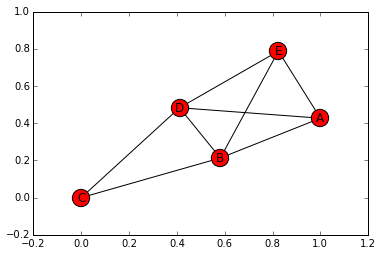

Matriz de Adyacencia:
    A   B   C   D   E   
A [ 0.  1.  0.  1.  1.]
B [ 1.  0.  1.  1.  1.]
C [ 0.  1.  0.  1.  0.]
D [ 1.  1.  1.  0.  1.]
E [ 1.  1.  0.  1.  0.]
Lista de Adyacencia:
A : ['B', 'E', 'D']
B : ['C', 'D', 'A', 'E']
C : ['B', 'D']
D : ['C', 'B', 'E', 'A']
E : ['B', 'A', 'D']


In [13]:
G = nx.Graph()
#G.add_node("A")
#G.add_node("B")
#G.add_node("C")
#G.add_node("D")
#G.add_node("E")
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "D")
G.add_edge("D", "E")
G.add_edge("E", "A")
G.add_edge("A", "D")
G.add_edge("E", "B")
G.add_edge("B", "D")
nx.draw_networkx(G)
plt.show()
imprime_adyacencia(G)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


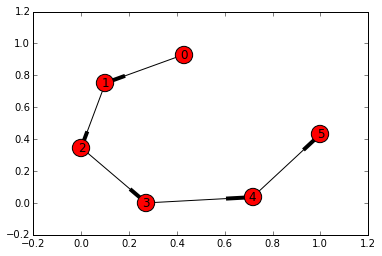

Matriz de Adyacencia:
    0   1   2   3   4   5   
0 [ 0.  1.  0.  0.  0.  0.]
1 [ 0.  0.  1.  0.  0.  0.]
2 [ 0.  0.  0.  1.  0.  0.]
3 [ 0.  0.  0.  0.  1.  0.]
4 [ 0.  0.  0.  0.  0.  1.]
5 [ 0.  0.  0.  0.  0.  0.]
Lista de Adyacencia:
0 : [1]
1 : [2]
2 : [3]
3 : [4]
4 : [5]
5 : []


In [14]:
cadena = nx.DiGraph()
for i in range(5):
    cadena.add_edge(i,i + 1)
nx.draw_networkx(cadena)
plt.show()
imprime_adyacencia(cadena)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


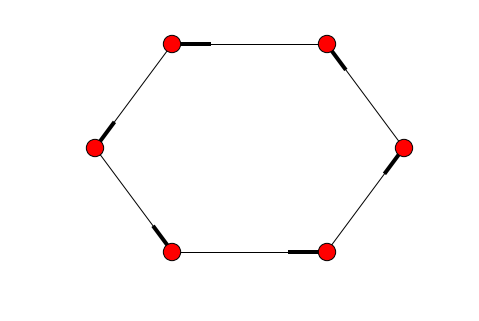

Matriz de Adyacencia:
    0   1   2   3   4   5   
0 [ 0.  1.  0.  0.  0.  0.]
1 [ 0.  0.  1.  0.  0.  0.]
2 [ 0.  0.  0.  1.  0.  0.]
3 [ 0.  0.  0.  0.  1.  0.]
4 [ 0.  0.  0.  0.  0.  1.]
5 [ 1.  0.  0.  0.  0.  0.]
Lista de Adyacencia:
0 : [1]
1 : [2]
2 : [3]
3 : [4]
4 : [5]
5 : [0]


In [15]:
# un ciclo
ciclo = cadena.copy()  # crea una copia de la gráfica
ciclo.add_edge(5,0)  # añadimos la arista que falta
nx.draw_circular(ciclo)
plt.show()
imprime_adyacencia(ciclo)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


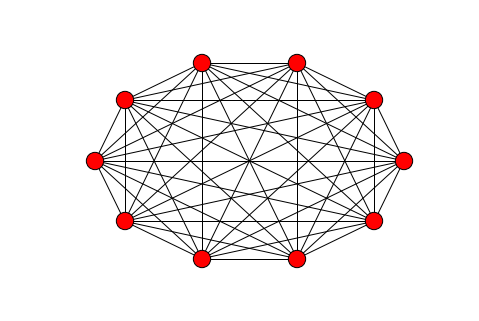

Matriz de Adyacencia:
    0   1   2   3   4   5   6   7   8   9   
0 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1 [ 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
2 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
3 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
4 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
5 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.]
6 [ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
7 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  1.]
8 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]
9 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
Lista de Adyacencia:
0 : [1 2 3 4 5 6 7 8 9]
1 : [0 2 3 4 5 6 7 8 9]
2 : [0 1 3 4 5 6 7 8 9]
3 : [0 1 2 4 5 6 7 8 9]
4 : [0 1 2 3 5 6 7 8 9]
5 : [0 1 2 3 4 6 7 8 9]
6 : [0 1 2 3 4 5 7 8 9]
7 : [0 1 2 3 4 5 6 8 9]
8 : [0 1 2 3 4 5 6 7 9]
9 : [0 1 2 3 4 5 6 7 8]


In [16]:
# completa (todos contra todos)
completa = nx.Graph()
n = 10
aristas = ((i,j) for i in range(n) for j in range(n) if j>i)
#list(aristas)
completa.add_edges_from(aristas)
nx.draw_circular(completa)
plt.show()
imprime_adyacencia(completa)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


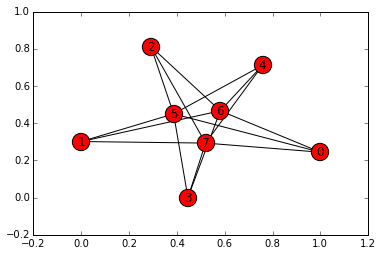

Matriz de Adyacencia:
    0   1   2   3   4   5   6   7   
0 [ 0.  0.  0.  0.  0.  1.  1.  1.]
1 [ 0.  0.  0.  0.  0.  1.  1.  1.]
2 [ 0.  0.  0.  0.  0.  1.  1.  1.]
3 [ 0.  0.  0.  0.  0.  1.  1.  1.]
4 [ 0.  0.  0.  0.  0.  1.  1.  1.]
5 [ 1.  1.  1.  1.  1.  0.  0.  0.]
6 [ 1.  1.  1.  1.  1.  0.  0.  0.]
7 [ 1.  1.  1.  1.  1.  0.  0.  0.]
Lista de Adyacencia:
0 : [5, 6, 7]
1 : [5, 6, 7]
2 : [5, 6, 7]
3 : [5, 6, 7]
4 : [5, 6, 7]
5 : [0, 1, 2, 3, 4]
6 : [0, 1, 2, 3, 4]
7 : [0, 1, 2, 3, 4]


In [17]:
# bipartita completa (todos de un subconjunto contra todos los del otro)
bipartita = nx.Graph()
n = 5
m = 3
aristas = ((i,j) for i in range(n) for j in range(n, m+n))
#list(aristas)
bipartita.add_edges_from(aristas)
nx.draw_networkx(bipartita)
plt.show()
imprime_adyacencia(bipartita)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


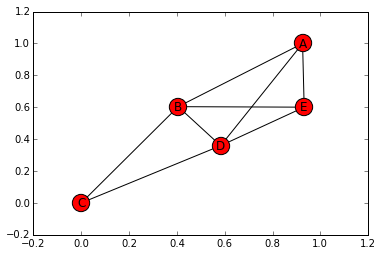

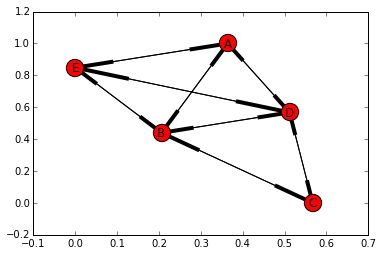

In [18]:
nx.draw_networkx(gráfica_desde_lista(a_lista(G)))
#plt.savefig("casita")
plt.show()
nx.draw_networkx(digráfica_desde_lista(a_lista(G)))
plt.show()

nodos: [0 1 2 3 4 5 6 7]
lista: [[5, 6, 7] [5, 6, 7] [5, 6, 7] [5, 6, 7] [5, 6, 7] [0, 1, 2, 3, 4]
 [0, 1, 2, 3, 4] [0, 1, 2, 3, 4]]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


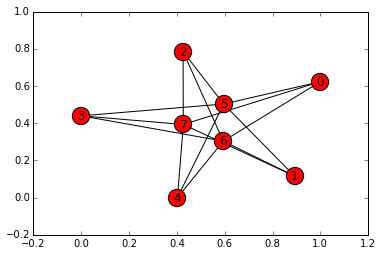

In [19]:
# guarda lista de adyacencia
d = a_lista(bipartita)
np.savez("casita", nodos=d["nodos"], lista=d["lista"])

# carga lista de adyacencia
cas = np.load("casita.npz")
print("nodos:", cas["nodos"])
print("lista:", cas["lista"])
casita = gráfica_desde_lista(cas)
cas.close()
nx.draw_networkx(casita)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


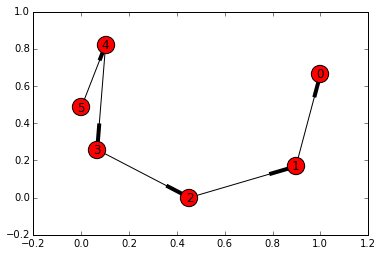

In [20]:
cad = a_matriz(cadena)
cad_t = desde_matriz({"nodos":cad["nodos"],
                    "matriz":cad["matriz"].T}, digráfica=True) # transpuesta
nx.draw_networkx(cad_t)  # hace que las flechas cambien de dirección

Ejercicios:

* Construya las gráficas de los sólidos platónicos (tetraedro, cubo, octaedro, dodecaedro, icosaedro)
* Guárdelas como listas de adyacencia y como figuras
* Revisar en el sitio web de Networkx como modificar el color de nodos y aristas, para cambiar la apariencia de estas gráficas

[[0 1 0 0 1 0 0 0 1 1]
 [0 1 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


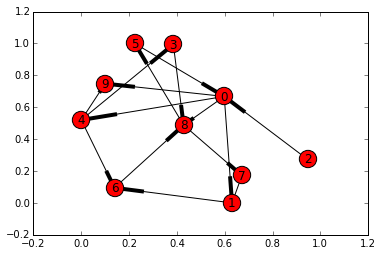

{1: 3, 2: 2, 3: 2, 4: 2}

In [70]:
mat = np.random.random(100).reshape(10,10)
p = .2 # prob. de conexión
mat = np.where(mat<p, 1, 0)
print(mat)

rnd = desde(mat, digráfica=True)
nx.draw_networkx(rnd)
plt.show()
dict(nx.node_degree_xy(rnd))